In [1]:
#Summarize the provided dataset to get a sense of Cybersecurity Culture in Organizations working on NGS. 
#This includes Cluster Analysis: Summarize responses related to  Group organizations based on similarities in their cybersecurity culture to identify
#distinct clusters working with Next generation Sequencing by using all the relevant questions. 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "cleaneddata_NGS.csv"
df = pd.read_csv(file_path)

In [3]:
# Relevant columns to analyze
columns_to_analyze = [
    #25
    'How would you describe the overall culture of cybersecurity within your organization',
    #33
    'Do you collaborate with cybersecurity experts or professionals to enhance the security posture of NGS systems and data',
    #39
    'Does your organization have clear and accessible cybersecurity policies specific to NGS operations or sensitive healthcare data such as DNA sequencing data',
    #37
    'In the last year, how often has cybersecurity been discussed in your meetings or other organizational communications',
    #38
    'What methods does your organization use to communicate about cybersecurity issues (Select all that apply)'
]

In [4]:
# Rename columns to be more concise
df.rename(columns={
    'How would you describe the overall culture of cybersecurity within your organization' : 'overall_culture',
    'Do you collaborate with cybersecurity experts or professionals to enhance the security posture of NGS systems and data': 'collaboration_with_experts',
    'Does your organization have clear and accessible cybersecurity policies specific to NGS operations or sensitive healthcare data such as DNA sequencing data': 'cs_policies',
    'In the last year, how often has cybersecurity been discussed in your meetings or other organizational communications': 'cs_meeting_discussions',
    'What methods does your organization use to communicate about cybersecurity issues (Select all that apply)': 'cs_communication_methods'
}, inplace=True)

In [5]:
# Update columns_to_analyze with the renamed columns
columns_to_analyze = [
   'overall_culture',
    'collaboration_with_experts',
    'cs_policies',
    'cs_meeting_discussions',
    'cs_communication_methods'
]

In [6]:
# Encode categorical variables to numerical values
def create_frequency_mapping(df, columns):
    unique_values = set()
    for col in columns:
        unique_values.update(df[col].dropna().unique())
    
    unique_values = sorted(list(unique_values))
    mapping = {value: index for index, value in enumerate(unique_values)}
    
    return mapping

In [7]:
# Create frequency mapping
frequency_mapping = create_frequency_mapping(df, columns_to_analyze)

In [8]:
# Convert relevant columns using the mapping
for col in columns_to_analyze:
    df[col] = df[col].map(frequency_mapping)

In [9]:
# Drop rows with missing values
df_cleaned = df.dropna(subset=columns_to_analyze)

In [10]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned[columns_to_analyze])

In [11]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  #  adjust the number of clusters
clusters = kmeans.fit_predict(scaled_data)

In [12]:
# Add the cluster labels to the DataFrame
df_cleaned['cluster'] = clusters

In [13]:
# Analyze and summarize the identified clusters
cluster_summary = df_cleaned.groupby('cluster')[columns_to_analyze].mean()

In [14]:
# Display the cluster summary
print("Cluster Summary:")
print(cluster_summary)

Cluster Summary:
         overall_culture  collaboration_with_experts  cs_policies  \
cluster                                                             
0              17.941176                   24.352941    24.470588   
1              16.384615                   15.000000    23.076923   
2               5.600000                   24.300000    21.500000   

         cs_meeting_discussions  cs_communication_methods  
cluster                                                    
0                     12.823529                  9.705882  
1                     13.384615                 10.000000  
2                      5.200000                  7.500000  


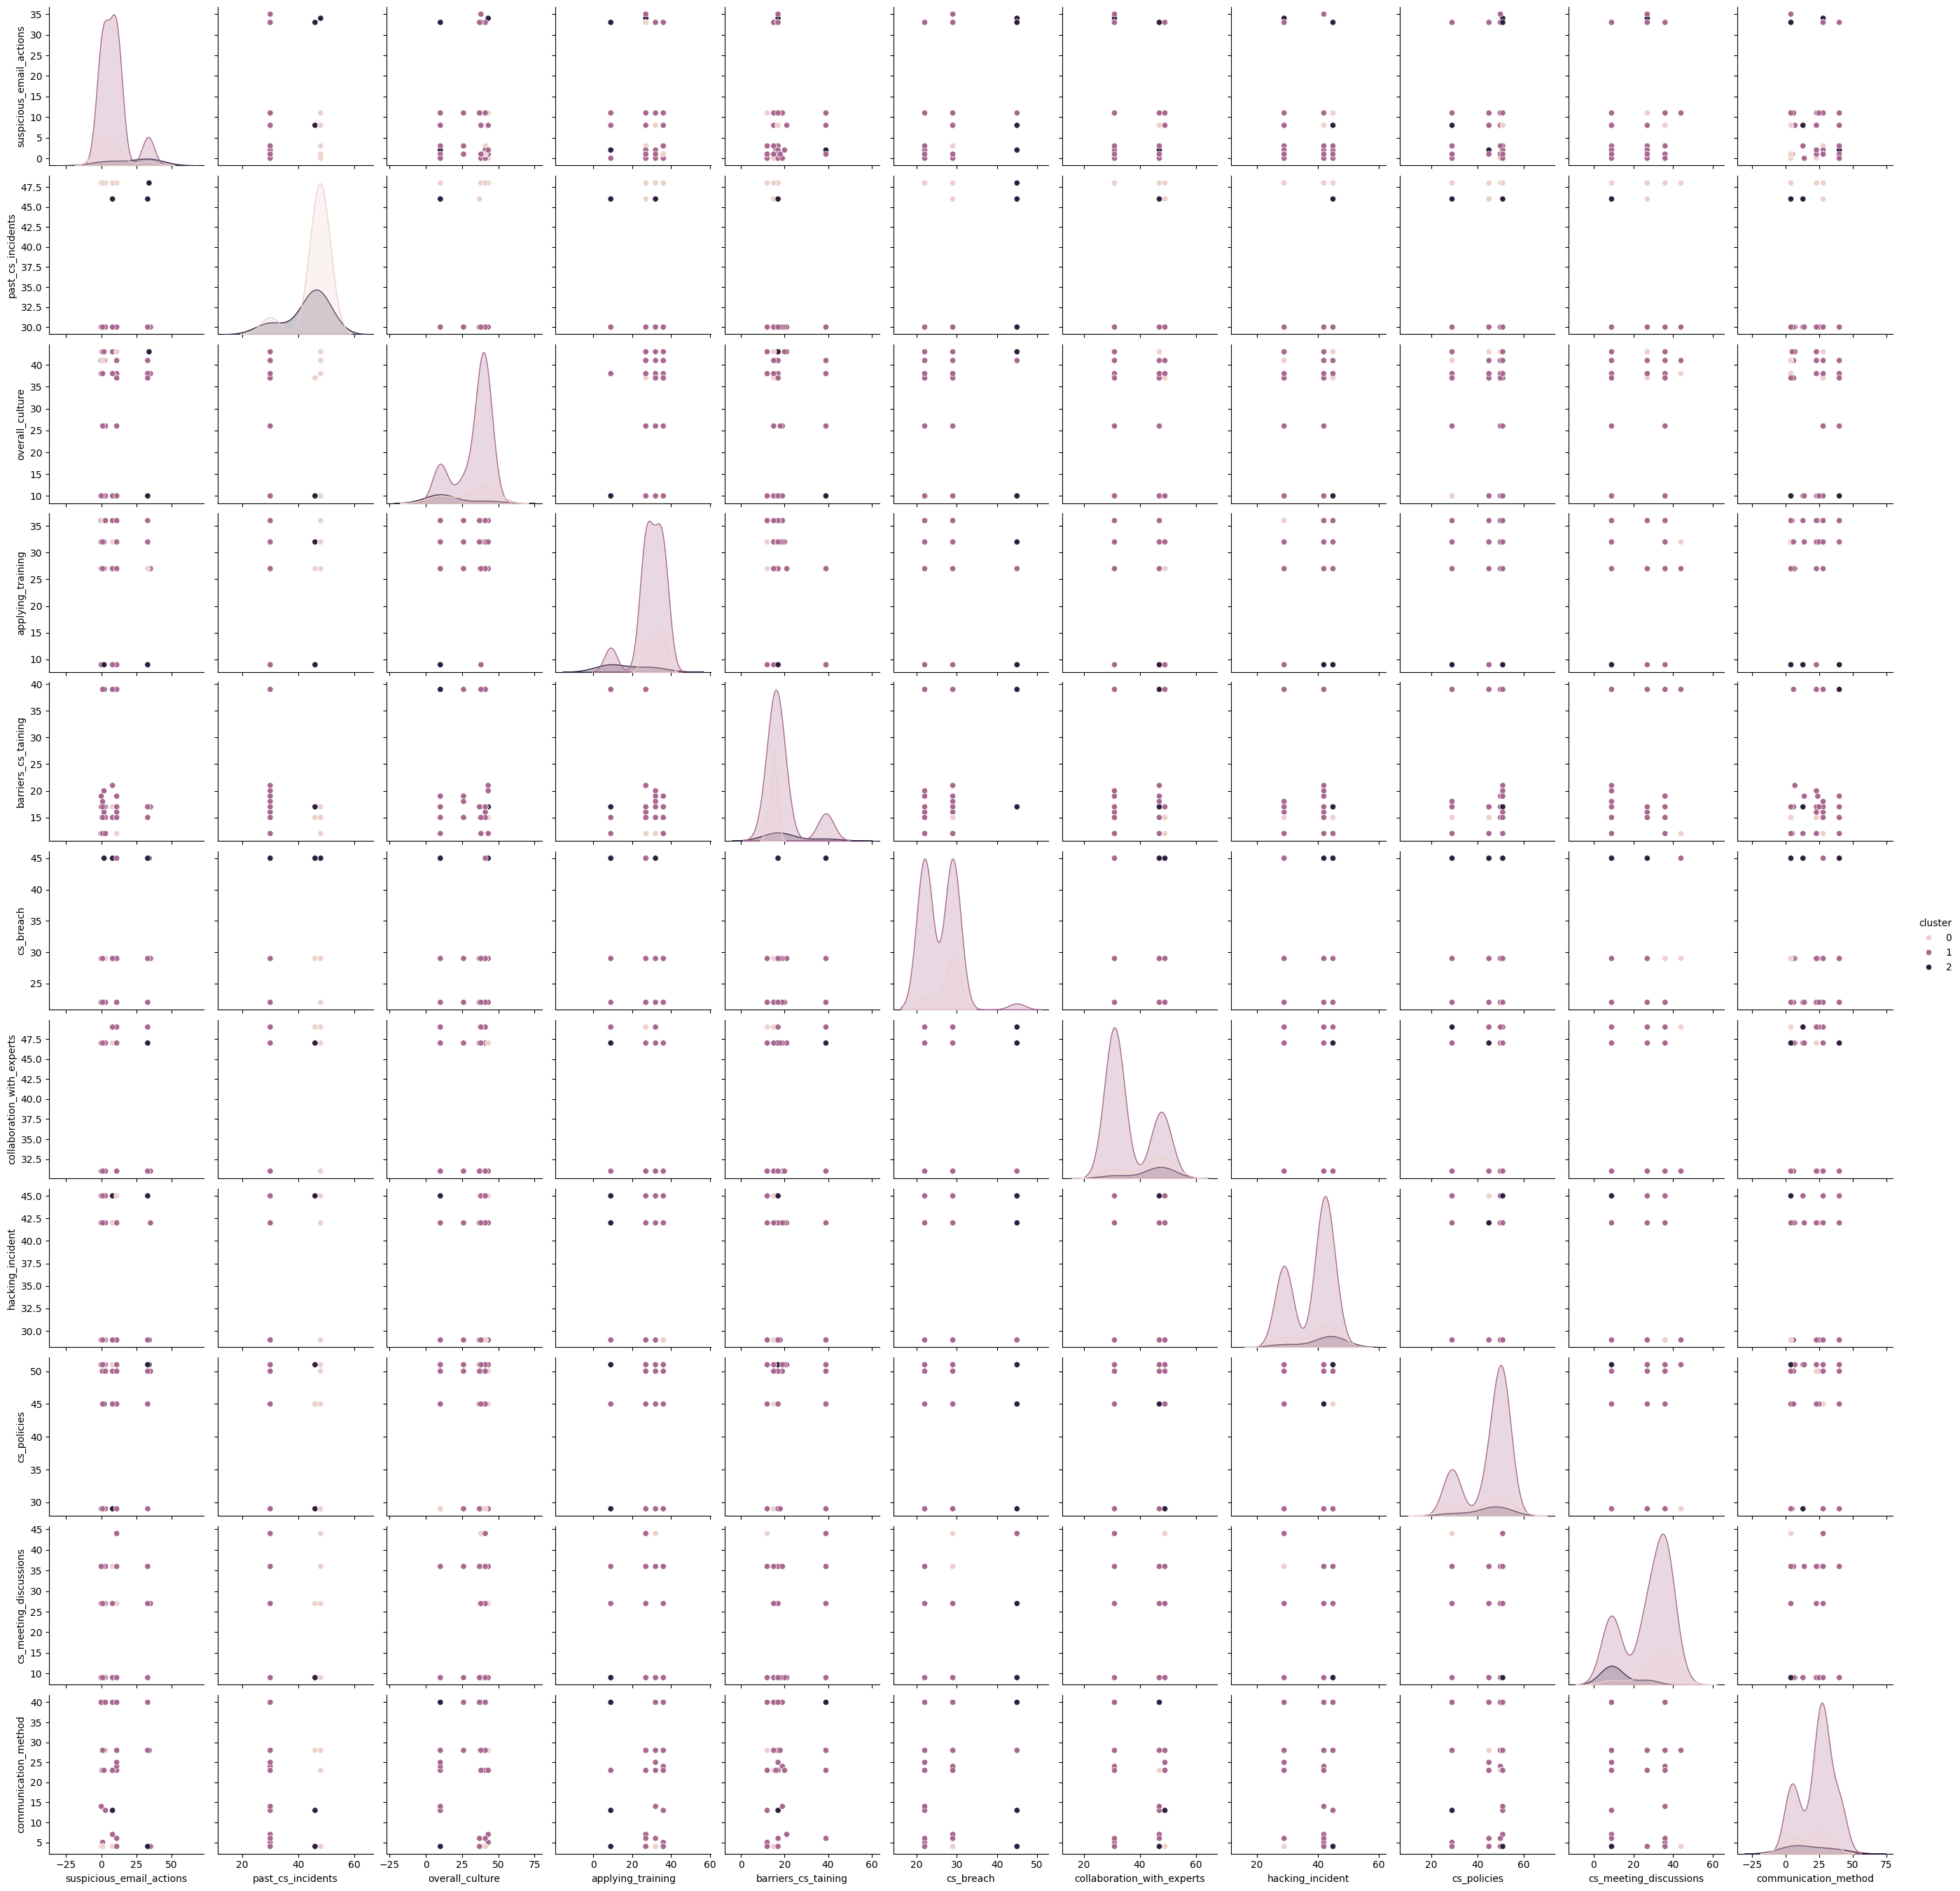

In [62]:
# Visualize the clusters
sns.pairplot(df_cleaned, hue='cluster', vars=columns_to_analyze)
plt.show()